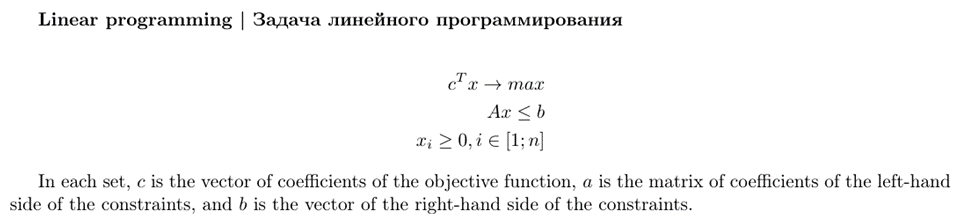

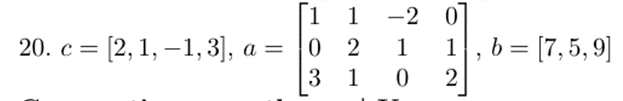

Problem Data
1.	**Objective Function:** Maximize 𝑍=2𝑥1+𝑥2−𝑥3+3𝑥4

2.	**Constraints:**
- 	𝑥1+𝑥2−2𝑥3+0𝑥4≤7
- x1+2𝑥2+𝑥3+𝑥4≤5
- 3𝑥1+𝑥2+0𝑥3+2𝑥4≤9
3.	**Non-negativity:**
- •	𝑥1,𝑥2,𝑥3,𝑥4≥0


In [ ]:
import numpy as np

# Coefficients for the objective function
objective_coeffs = np.array([2, 1, -1, 3, 0, 0, 0])

# Constraint matrix including slack variables
constraint_matrix = np.array([
    [1, 1, -2, 0, 1, 0, 0],
    [0, 2, 1, 1, 0, 1, 0],
    [3, 1, 0, 2, 0, 0, 1]
])

# Resource vector
resources = np.array([7, 5, 9])

# Number of variables including slack variables
total_vars = len(objective_coeffs)

# Initialize the simplex tableau
simplex_table = np.zeros((constraint_matrix.shape[0] + 1, constraint_matrix.shape[1] + 1))
simplex_table[:-1, :-1] = constraint_matrix
simplex_table[:-1, -1] = resources
simplex_table[-1, :-1] = -objective_coeffs

In [ ]:
def run_simplex(table):
    while True:
        # Identify pivot column (most negative value in the bottom row)
        pivot_col = np.argmin(table[-1, :-1])
        if table[-1, pivot_col] >= 0:
            break

        # Identify pivot row
        ratios = table[:-1, -1] / table[:-1, pivot_col]
        ratios[ratios <= 0] = np.inf
        pivot_row = np.argmin(ratios)

        # Normalize the pivot row
        pivot_element = table[pivot_row, pivot_col]
        table[pivot_row, :] /= pivot_element

        # Update other rows
        for row in range(table.shape[0]):
            if row != pivot_row:
                table[row, :] -= table[row, pivot_col] * table[pivot_row, :]

    # Extract the solution
    solution = np.zeros(total_vars - 3)
    for i in range(total_vars - 3):
        col = table[:-1, i]
        if np.count_nonzero(col) == 1 and np.any(col == 1):
            solution[i] = table[np.where(col == 1)[0], -1][0]

    return solution, table[-1, -1]

In [ ]:
optimal_solution, optimal_value = run_simplex(simplex_table)
print("Optimal solution:", optimal_solution)
print("Optimal value:", optimal_value)

Optimal solution: [0.  0.  0.  4.5]
Optimal value: 13.5


<ipython-input-4-f6fa31671341>:9: RuntimeWarning: divide by zero encountered in divide
  ratios = table[:-1, -1] / table[:-1, pivot_col]


The optimal solution for the linear programming problem is:

\[ x1 = 0, x2 = 0, x3 = 0, x4 = 4.5 \]

The maximum value of the objective function is 13.5.

In other words, to maximize the objective function \( 2x1 + x2 - x3 + 3x4 \) given the specified constraints, the highest value achieved is 13.5 when \( x4 = 4.5 \) and all other variables are zero.

